MICROSOFT MOVIE ANALYSIS

1.BUSINESS UNDERSTANDING

    A.INTRODUCTION

When choosing the kinds of films to make, resource limitations must be taken into consideration. Understanding the available resources can help you determine the size and extent of the movie studio's production capabilities, including the budget, talent pool, and technological infrastructure. Microsoft will be able to set standards for success and gauge the studio's performance in the market by defining the major success measures, such as box office revenues, profitability, audience ratings, and critical acclaim. 

Additionally, it is crucial to take into account the wants and requirements of the many parties involved, particularly the head of Microsoft's film division. It will be possible to make sure that the conclusions and insights drawn from the analysis are suited to their demands for making decisions by comprehending their vision, goals, and particular requirements.

Microsoft can successfully investigate the kinds of movies that are now successful at the box office by developing a thorough understanding of the commercial context. The conclusions drawn from this project will offer the head of the movie studio implementable suggestions that will direct their choices regarding the ideal film production approach. This includes choosing a genre that appeals to the target demographic, allocating resources wisely, and matching the movies' branding to Microsoft. In the end, these insights will help Microsoft produce hit movies and forge a significant foothold in the film business.


    B.PROBLEM STATEMENT

Microsoft's inexperience in the movie-making industry is a major barrier to the success of their recently launched movie studio. The current challenge is to identify the traits and categories of movies that have enjoyed significant box office success. The idea is to provide the head of Microsoft's movie studio with the knowledge needed to choose the kinds of movies to make, increasing the likelihood of success.

    C.MAIN OBJECTIVE

To perform exploratory data analysis in order to learn more about the kinds of movies that are currently doing well at the box office

    D.SPECIFIC OBJECTIVES

-Conduct exploratory data analysis to find patterns, trends, and connections between audience preferences, box office success, and popular genres.

-Draw conclusions that can be put into practice from the data analysis, highlighting the categories of movies that are connecting with audiences and doing well at the box office.

-Deliver a thorough presentation that includes a summary of the data analysis's findings, conclusions, and suggestions.

2.IMPORTING LIBRARIES

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.READING THE DATA

In [345]:
#loading data on movie gross
bom_data = pd.read_csv('Datasets/bom.movie_gross.csv.gz')
bom_data.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [346]:
#loading data on budgets
budgets_data = pd.read_csv('Datasets/tn.movie_budgets.csv.gz')
budgets_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [347]:
#loading data on titles basics
title_data = pd.read_csv('Datasets/imdb.title.basics.csv.gz')
title_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [348]:
#loading data on ratings
ratings_data = pd.read_csv('Datasets/imdb.title.ratings.csv.gz')
ratings_data.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [349]:
#loading data on movies
movies_data = pd.read_csv('Datasets/tmdb.movies.csv.gz')
movies_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


4.DATA CLEANING

    4.1.UNIQUE IDENTIFIERS $ DUPLICATES

In [350]:
#identify the unique identifiers on the bom dataset
columns_to_check = ['title','studio','domestic_gross','foreign_gross','year']

for column in columns_to_check:
    unique_values = bom_data[column].unique()
    num_unique_values = bom_data[column].nunique()
print(f"Unique values in column '{column}':")
print(unique_values)
print(f"Number of unique values in column '{column}': {num_unique_values}")


Unique values in column 'year':
[2010 2011 2012 2013 2014 2015 2016 2017 2018]
Number of unique values in column 'year': 9


In [351]:
def check_column_duplicates(bom_data):
    for column in bom_data.columns:
        duplicates_count = bom_data[column].duplicated().sum()
        duplicates_percentage = (duplicates_count / len(bom_data)) * 100

        if duplicates_count == 0:
            print(f"No duplicates found in column '{column}'.")
        else:
            print(f"{duplicates_count} duplicates found in column '{column}'.")
            print(f"This constitutes {duplicates_percentage:2f}% of the column.")

check_column_duplicates(bom_data)

1 duplicates found in column 'title'.
This constitutes 0.029525% of the column.
3129 duplicates found in column 'studio'.
This constitutes 92.382640% of the column.
1589 duplicates found in column 'domestic_gross'.
This constitutes 46.914674% of the column.
2182 duplicates found in column 'foreign_gross'.
This constitutes 64.422793% of the column.
3378 duplicates found in column 'year'.
This constitutes 99.734278% of the column.


In [352]:
#identify the unique  identifier in the budgets dataset
columns_to_check = ['id','release_date','movie','production_budget','domestic_gross','worldwide_gross']

for column in columns_to_check:
    unique_values = budgets_data[column].unique()
    num_unique_values = budgets_data[column].nunique()
print(f"Unique values in column '{column}':")
print(unique_values)
print(f"Number of unique values in column '{column}': {num_unique_values}")

Unique values in column 'worldwide_gross':
['$2,776,345,279' '$1,045,663,875' '$149,762,350' ... '$240,495' '$1,338'
 '$181,041']
Number of unique values in column 'worldwide_gross': 5356


In [353]:
#check for duplicates in the budgets dataset
def check_column_duplicates(data):
    for column in data.columns:
        duplicates_count = data[column].duplicated().sum()
        duplicates_percentage = (duplicates_count / len(data)) * 100

        if duplicates_count == 0:
            print(f"No duplicates found in column '{column}'.")
        else:
            print(f"{duplicates_count} duplicates found in column '{column}'.")
            print(f"This constitutes {duplicates_percentage:2f}% of the column.")

check_column_duplicates(budgets_data)


5682 duplicates found in column 'id'.
This constitutes 98.270495% of the column.
3364 duplicates found in column 'release_date'.
This constitutes 58.180560% of the column.
84 duplicates found in column 'movie'.
This constitutes 1.452785% of the column.
5273 duplicates found in column 'production_budget'.
This constitutes 91.196818% of the column.
618 duplicates found in column 'domestic_gross'.
This constitutes 10.688343% of the column.
426 duplicates found in column 'worldwide_gross'.
This constitutes 7.367693% of the column.


In [354]:
#identify the unique  identifier in the titles dataset
columns_to_check = ['tconst','primary_title','original_title','start_year','runtime_minutes','genres']

for column in columns_to_check:
    unique_values = title_data[column].unique()
    num_unique_values = title_data[column].nunique()
print(f"Unique values in column '{column}':")
print(unique_values)
print(f"Number of unique values in column '{column}': {num_unique_values}")

Unique values in column 'genres':
['Action,Crime,Drama' 'Biography,Drama' 'Drama' ...
 'Music,Musical,Reality-TV' 'Animation,Crime' 'Adventure,History,War']
Number of unique values in column 'genres': 1085


In [355]:
#check for duplicates in the titles dataset
def check_column_duplicates(data):
    for column in data.columns:
        duplicates_count = data[column].duplicated().sum()
        duplicates_percentage = (duplicates_count / len(data)) * 100

        if duplicates_count == 0:
            print(f"No duplicates found in column '{column}'.")
        else:
            print(f"{duplicates_count} duplicates found in column '{column}'.")
            print(f"This constitutes {duplicates_percentage:2f}% of the column.")

check_column_duplicates(title_data)

No duplicates found in column 'tconst'.
10073 duplicates found in column 'primary_title'.
This constitutes 6.892517% of the column.
8370 duplicates found in column 'original_title'.
This constitutes 5.727228% of the column.
146125 duplicates found in column 'start_year'.
This constitutes 99.986999% of the column.
145776 duplicates found in column 'runtime_minutes'.
This constitutes 99.748194% of the column.
145058 duplicates found in column 'genres'.
This constitutes 99.256897% of the column.


In [356]:
#identify the unique  identifier in the movies dataset
columns_to_check = ['Unnamed: 0','genre_ids','id','original_language','original_title','popularity','title', 'release_date','vote_count','vote_average']

for column in columns_to_check:
    unique_values = movies_data[column].unique()
    num_unique_values = movies_data[column].nunique()
print(f"Unique values in column '{column}':")
print(unique_values)
print(f"Number of unique values in column '{column}': {num_unique_values}")

Unique values in column 'vote_average':
[ 7.7  6.8  7.9  8.3  6.1  7.4  7.2  7.5  6.6  6.   6.7  4.5  7.3  8.1
  6.3  4.6  5.7  5.9  8.2  6.2  6.4  7.6  6.5  7.1  5.6  5.3  7.   5.8
  4.9  5.1  5.5  6.9  5.4  7.8  4.7  4.1  4.8  3.2  8.   3.7  5.2  2.7
  4.4  5.   2.9  2.   4.   4.2  3.9  4.3  3.5  3.8  3.6  3.4  3.3  3.1
  3.   2.5  2.6 10.   2.2  1.7  2.8  2.3  1.6  1.8  2.4  1.5  8.6  1.9
  9.   8.7  0.5  1.   8.4  2.1  8.8  1.3  9.5  8.5  9.8  0.   8.9  9.3
  9.4  9.2  0.8  1.2  1.4  9.1  9.7]
Number of unique values in column 'vote_average': 91


In [357]:
#check for duplicates in the movie dataset
def check_column_duplicates(data):
    for column in data.columns:
        duplicates_count = data[column].duplicated().sum()
        duplicates_percentage = (duplicates_count / len(data)) * 100

        if duplicates_count == 0:
            print(f"No duplicates found in column '{column}'.")
        else:
            print(f"{duplicates_count} duplicates found in column '{column}'.")
            print(f"This constitutes {duplicates_percentage:2f}% of the column.")

check_column_duplicates(movies_data)

No duplicates found in column 'Unnamed: 0'.
24040 duplicates found in column 'genre_ids'.
This constitutes 90.658823% of the column.
1020 duplicates found in column 'id'.
This constitutes 3.846589% of the column.
26441 duplicates found in column 'original_language'.
This constitutes 99.713391% of the column.
1682 duplicates found in column 'original_title'.
This constitutes 6.343101% of the column.
19092 duplicates found in column 'popularity'.
This constitutes 71.999095% of the column.
23084 duplicates found in column 'release_date'.
This constitutes 87.053588% of the column.
1829 duplicates found in column 'title'.
This constitutes 6.897462% of the column.
26426 duplicates found in column 'vote_average'.
This constitutes 99.656824% of the column.
24824 duplicates found in column 'vote_count'.
This constitutes 93.615417% of the column.


    4.2. CHECKING FOR MISSING VALUES IN THE DATASETS

In [358]:
#bom dataset
missing_values = bom_data.isnull().sum()
print(missing_values)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


This dataset has missing values in the columns:studio, domestic_gross and foreign_gross

In [359]:
#budgets dataset
missing_values = budgets_data.isnull().sum()
print(missing_values)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


This dataset has no missing values

In [360]:
#titles dataset
missing_values = title_data.isnull().sum()
print(missing_values)

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


This dataset has missing values in the columns: original_title, runtime_minutes and genres

In [361]:
#ratings dataset
missing_values = ratings_data.isnull().sum()
print(missing_values)

tconst           0
averagerating    0
numvotes         0
dtype: int64


This dataset has no missing values

In [362]:
#movies dataset
missing_values = movies_data.isnull().sum()
print(missing_values)

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


This dataset has no missing values

        4.3. DROPPING COLUMNS

Only a few features and rows from the various datasets that were gathered are important to the procedure. As a result, in this stage, the features from each dataset that were not necessary were removed. 

In [363]:
#list of column with duplicates
"""
The title column was dropped as it is not possible 
for one movie to have different titles
"""
#drop column with duplicates
bom_data.drop_duplicates(subset='title', keep='first', inplace=True)


In [364]:
bom_data.shape

(3386, 5)

This dataset contains 3386 rows and 5 columns

In [365]:
#list of columns with missing values
columns_with_missing_values = ['original_title','runtime_minutes', 'genres']
#drop columns with missing values
title_data= title_data.drop(columns_with_missing_values, axis=1)
print(title_data)

           tconst                                primary_title  start_year
0       tt0063540                                    Sunghursh        2013
1       tt0066787              One Day Before the Rainy Season        2019
2       tt0069049                   The Other Side of the Wind        2018
3       tt0069204                              Sabse Bada Sukh        2018
4       tt0100275                     The Wandering Soap Opera        2017
...           ...                                          ...         ...
146139  tt9916538                          Kuambil Lagi Hatiku        2019
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro        2015
146141  tt9916706                              Dankyavar Danka        2013
146142  tt9916730                                       6 Gunn        2017
146143  tt9916754               Chico Albuquerque - Revelações        2013

[146144 rows x 3 columns]


In [366]:
title_data.shape

(146144, 3)

This dataset contains 146144 rows and 3 columns

In [367]:
#drop the unnamed column from the movies dataset
movies_data.drop(['Unnamed: 0', 'genre_ids'], axis=1, inplace=True)
print(movies_data.drop)

<bound method DataFrame.drop of            id original_language                                original_title  \
0       12444                en  Harry Potter and the Deathly Hallows: Part 1   
1       10191                en                      How to Train Your Dragon   
2       10138                en                                    Iron Man 2   
3         862                en                                     Toy Story   
4       27205                en                                     Inception   
...       ...               ...                                           ...   
26512  488143                en                         Laboratory Conditions   
26513  485975                en                               _EXHIBIT_84xxx_   
26514  381231                en                                  The Last One   
26515  366854                en                                  Trailer Made   
26516  309885                en                                    The Church

    4.4.FORMATTING DATATYPES

In the budgets data, convert the 'production_budget', 'domestic_gross' and 'worldwide_gross' columns to numeric data type and convert to float type. then convert the 'release_date' column to a datetime data type.

In [368]:
#convert the datatypes to float and datetime
columns=['production_budget', 'domestic_gross','worldwide_gross']
for a in columns:
    budgets_data[a] = budgets_data[a].str.replace(r'\D', '',regex=True).astype(float)
   
print(budgets_data)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  
0           425000000.0     760507625.0     2.776345e+09  
1           410600000.0     2

In [369]:
budgets_data['release_date'] = pd.to_datetime(budgets_data['release_date'])
print(budgets_data)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  
0           425000000.0     760507625.0     2.776345e+09  
1           410600000.0     241063875.0  

In [370]:

#convert the datatypes
bom_data['foreign_gross'] = bom_data['foreign_gross'].str.replace(',', '').astype(float)
bom_data['foreign_gross'] = bom_data['foreign_gross'].astype(float)
bom_data['year'] = pd.to_datetime(bom_data['year'])
print(bom_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross        

In [371]:
bom_data.shape

(3386, 5)

In [372]:
bom_data.rename(columns={'year': 'release_date'}, inplace=True)

In [373]:
movies_data.drop_duplicates(subset='id', keep='first', inplace=True)

In [374]:
movies_data.shape

(25497, 8)

In [375]:
bom_data.shape

(3386, 5)

In [376]:
title_data.shape

(146144, 3)

    5.MERGING DATASETS
    

Datasets were merged in order to provide a better analysis.

The first datasets to be merged are budgets and movie dataset

In [377]:
#Rename the column in order to be able to merge the common column
df.rename(columns={'movie': 'title'}, inplace=True)

In [378]:
#Rename the vote_average to ratings
movies_data.rename(columns={'vote_average':'average_rating'}, inplace=True)

In [379]:
title_data.rename(columns={'primary_title':'title'}, inplace=True)

In [381]:
merged_data = pd.merge(movies_data, title_data, on='title', how='inner')
print(merged_data)

           id original_language  \
0       12444                en   
1       10191                en   
2       10138                en   
3       27205                en   
4       32657                en   
...       ...               ...   
22396  381231                en   
22397  381231                en   
22398  381231                en   
22399  366854                en   
22400  309885                en   

                                          original_title  popularity  \
0           Harry Potter and the Deathly Hallows: Part 1      33.533   
1                               How to Train Your Dragon      28.734   
2                                             Iron Man 2      28.515   
3                                              Inception      27.920   
4      Percy Jackson & the Olympians: The Lightning T...      26.691   
...                                                  ...         ...   
22396                                       The Last One       0.600   
223

In [382]:
merged_data.shape

(22401, 10)

In [383]:
merged_data = pd.merge(merged_data, bom_data, on='title', how='inner')
print(merged_data)

          id original_language              original_title  popularity  \
0      10191                en    How to Train Your Dragon      28.734   
1      10138                en                  Iron Man 2      28.515   
2      27205                en                   Inception      27.920   
3      10193                en                 Toy Story 3      24.445   
4      20352                en               Despicable Me      23.673   
...      ...               ...                         ...         ...   
3411  473262                it                  Nico, 1988       3.789   
3412  465871                en             Maria by Callas       3.184   
3413  332718                en  Bilal: A New Breed of Hero       2.707   
3414  498919                es        La Boda de Valentina       2.550   
3415  551634                zh                       你好，之华       0.600   

     release_date_x                       title  average_rating  vote_count  \
0        2010-03-26    How to Tr

In [384]:
merged_data.rename(columns={'release_date_x':'release_date'}, inplace=True)

In [385]:
print(merged_data)

          id original_language              original_title  popularity  \
0      10191                en    How to Train Your Dragon      28.734   
1      10138                en                  Iron Man 2      28.515   
2      27205                en                   Inception      27.920   
3      10193                en                 Toy Story 3      24.445   
4      20352                en               Despicable Me      23.673   
...      ...               ...                         ...         ...   
3411  473262                it                  Nico, 1988       3.789   
3412  465871                en             Maria by Callas       3.184   
3413  332718                en  Bilal: A New Breed of Hero       2.707   
3414  498919                es        La Boda de Valentina       2.550   
3415  551634                zh                       你好，之华       0.600   

     release_date                       title  average_rating  vote_count  \
0      2010-03-26    How to Train 

    6.EXPLORATIVE DATA ANALYSIS


In [388]:
numeric_columns = ['popularity','average_rating','vote_count']
statistics = merged_data[numeric_columns].describe()
print(statistics)

        popularity  average_rating    vote_count
count  3416.000000     3416.000000   3416.000000
mean      9.169670        6.302371   1188.361241
std       7.135191        1.068504   2246.388723
min       0.600000        0.000000      1.000000
25%       4.722250        5.800000     47.750000
50%       8.233000        6.300000    320.500000
75%      11.983000        7.000000   1259.500000
max      80.773000       10.000000  22186.000000


This has provided a summary of the statistics

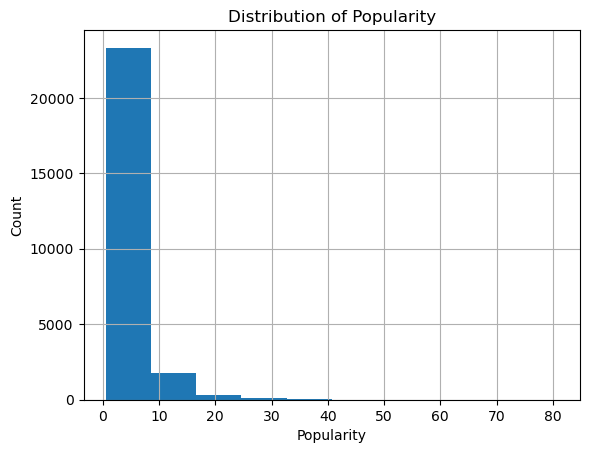

In [389]:
#histogram
movies_data['popularity'].hist(bins=10)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

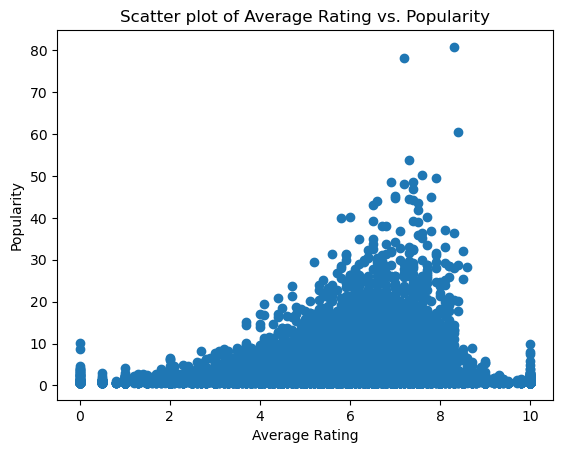

In [390]:
#scatter plot
plt.scatter(movies_data['average_rating'], movies_data['popularity'])
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.title('Scatter plot of Average Rating vs. Popularity')
plt.show()

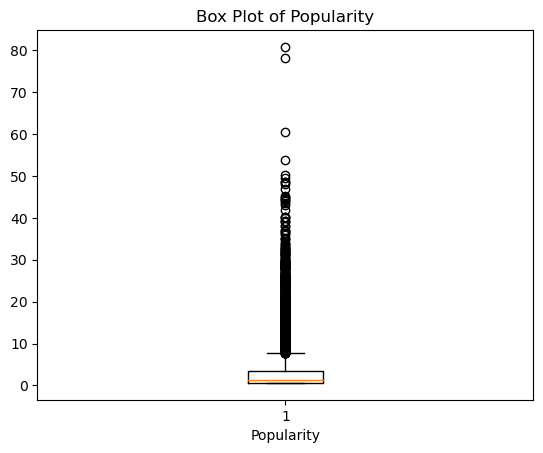

In [392]:
#box plot 
plt.boxplot(movies_data['popularity'])
plt.xlabel('Popularity')
plt.title('Box Plot of Popularity')
plt.show()